##  SUBMISSION FOR MP2LAB

Swapnila Chakrabarty
BSc. Physics(H)

## Modelling the spread of coronavirus using SEIR model.

The SIR model is always a very good starting point for learning epidemiology but the model has several drawbacks that makes it severely inaccurate. In this assignment we take up the task of plotting the spread of coronavirus in a small city/country. We take up a place with moderate population so the assumption of homegeneity is asserted. 
I take up the country of Malayasia which has successfully managed to restrict its total number of cases to only 10k due to early demonstration of the MCO. Despite the detection of a ten times more infectious strain, the number of new cases everyday are well under 20.
I will be using the SEIR model, which is a significant improvement over SIR model.
The equations for it are as follows:
$$\frac{dS}{dt}=\Lambda - \mu S -\frac{ \beta IS}{N} $$
$$\frac{dE}{dt}= \frac{\beta IS}{N} - (\mu + \sigma)E $$
$$ \frac{dI}{dt}= \sigma E - (\gamma +\mu) I$$
$$\frac{dR}{dt}= \gamma I - \mu R$$
Here,E is an extra term which represent the exposed section of the population i.e who are infected but cannot infect yet.
$\Lambda$(br)and $\mu$(dr) are birth rate and natural death rate of the population which are taken to be equal for simplicity, 0.0005 for Malayasia.
$\beta$ is the coefficient of infection which is very low at 0.19 for Malayasia due to the imposition of the lockdown, it will be represented as $b$ in the program. $\sigma$ is the coefficient of latency which is $\frac {1}{5.2}$ for coronavirus, it will be represented as $a$ in the program. Lastly, $\gamma$ is the coeffiecient of migration rate which  is $\frac {1}{14}$ , 14 being the average recovery time of corona virus ($k$ in the program).
Now, scaling down the equations with respect to the whole population ( $N$=32M for Malayasia) and applying the Euler's algorithm we get the following equations:
$$ s(t+\Delta t) = s(t) + \Delta( br - drs(t) - bi(t)s(t)$$
$$ e(t +\Delta t) = e(t) + \Delta ( bi(t)s(t) - (dr+a)e(t))$$
$$ i(t+ \Delta t) = i(t) + \Delta(ae(t) - (k+dr)i(t))$$
$$ r( t+\Delta t) = r(t) +\Delta ( ki(t) - dr*r(t))$$
I will start my plotting from february 15, after the end of first wave of cases.

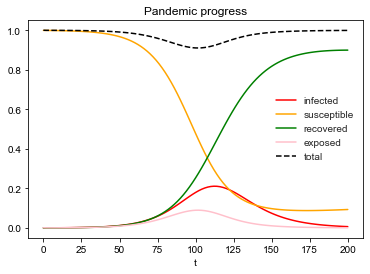

In [1]:
import matplotlib.pyplot as plt # Plotting library imported
%matplotlib inline 

s=0.99994
e=0.0008
i=0.00005
r=0.000009
t=0
tf=200
dt=2
slices=int(tf/dt)
slist=[s]
elist=[e]
ilist=[i]
rlist=[r]
tlist=[t]
totals=[s+e+i+r]
br=0.0005
dr=0.0005
b=0.2
a=0.19
k=0.07

for step in range(0,slices):
    s_temp = s + dt*(br - dr*s - b*i*s)
    r_temp = r + dt*(k*i - dr*r)
    i_temp = i + dt*(a*e - (dr+k)*i)
    e_temp = e + dt*(b*i*s - (dr+a)*e)
    
    s = s_temp
    r = r_temp
    i = i_temp
    e = e_temp
    
    t += dt
    
    slist.append(s)
    rlist.append(r)
    ilist.append(i)
    elist.append(e)
    tlist.append(t)
    totals.append(s+r+i)
    
plt.xlabel('t') # Label of 'x' axis
plt.style.use('seaborn-whitegrid')
plt.title('Pandemic progress') # Title of plot
plt.plot(tlist, ilist, linestyle = '-', color='red', label='infected')
plt.plot(tlist, slist, linestyle = '-', color='orange', label='susceptible')
plt.plot(tlist, rlist, linestyle = '-', color='green', label='recovered')
plt.plot(tlist, elist, linestyle = '-', color= 'pink', label='exposed')
plt.plot(tlist, totals, linestyle = '--', color = 'black', label = 'total')
plt.legend();
    

The only problem with the graph obtained is the fact that nearly 20 percent of the population is getting infected whereas the fraction is very very low. This arises because of the assumption that every person of the population is susceptible but in reality only a certain section is, even without the lockdown. Also, the peak is 110 days later, which coincides with Malayasia's predicted peak at the beginning of June. Coinciding with the peak is the fact that almost 40 percent of the population has recovered. Scientifically, the implementation of lockdown prolongs the stay of the virus but ensures less people get infected and so it did for Malayasia.